In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error

In [2]:
data = pd.read_csv('image_bins_stats_lungs1.csv')
data.shape

(2484, 106)

In [3]:
data.head()

,filename,Bins0,Bins1,Bins2,Bins3,Bins4,Bins5,Bins6,Bins7,rmean_bins0,...,bskew_bins7,bkurto_bins0,bkurto_bins1,bkurto_bins2,bkurto_bins3,bkurto_bins4,bkurto_bins5,bkurto_bins6,bkurto_bins7,class
0,transformed_image_covid_1.png,4722,15567,4,7683,12061,1,8864,16634,77.433079,...,29.26670025,39.092067,21.915792,15.564234,10.232452,12.530200,0.000000,40.674295,31.538221,0
1,transformed_image_covid_2.png,6556,13701,25,9956,9437,0,12114,13747,79.728951,...,33.53821958,28.281468,23.127681,11.979449,17.519198,24.313131,0.000000,38.506228,36.562100,0
2,transformed_image_covid_3.png,10512,12249,1,11502,7743,2,9619,13908,68.987348,...,25.22521593,26.681675,24.442798,0.000000,12.323460,38.083555,4.204482,55.658016,27.952446,0
3,transformed_image_covid_4.png,7987,11854,2,10419,11895,9,11931,11439,94.638788,...,34.51618537,24.056261,28.558353,0.840896,13.800903,27.757483,33.449086,44.809595,37.884099,0
4,transformed_image_covid_5.png,7761,14159,4,10898,10560,9,9153,12992,68.762015,...,32.13721328,27.884767,23.329477,13.445587,16.742312,28.738945,26.135224,49.330295,35.162254,0


In [4]:
data = data.drop(['filename'], axis=1)
data.head()

,Bins0,Bins1,Bins2,Bins3,Bins4,Bins5,Bins6,Bins7,rmean_bins0,rmean_bins1,...,bskew_bins7,bkurto_bins0,bkurto_bins1,bkurto_bins2,bkurto_bins3,bkurto_bins4,bkurto_bins5,bkurto_bins6,bkurto_bins7,class
0,4722,15567,4,7683,12061,1,8864,16634,77.433079,0.202929,...,29.26670025,39.092067,21.915792,15.564234,10.232452,12.530200,0.000000,40.674295,31.538221,0
1,6556,13701,25,9956,9437,0,12114,13747,79.728951,5.447851,...,33.53821958,28.281468,23.127681,11.979449,17.519198,24.313131,0.000000,38.506228,36.562100,0
2,10512,12249,1,11502,7743,2,9619,13908,68.987348,36.388358,...,25.22521593,26.681675,24.442798,0.000000,12.323460,38.083555,4.204482,55.658016,27.952446,0
3,7987,11854,2,10419,11895,9,11931,11439,94.638788,15.529948,...,34.51618537,24.056261,28.558353,0.840896,13.800903,27.757483,33.449086,44.809595,37.884099,0
4,7761,14159,4,10898,10560,9,9153,12992,68.762015,4.809379,...,32.13721328,27.884767,23.329477,13.445587,16.742312,28.738945,26.135224,49.330295,35.162254,0


In [5]:
name = ['rstd_bins0','rstd_bins1','rstd_bins2','rstd_bins3','rstd_bins4','rstd_bins5','rstd_bins6','rstd_bins7','gstd_bins0','gstd_bins1','gstd_bins2','gstd_bins3','gstd_bins4','gstd_bins5','gstd_bins6','gstd_bins7','bstd_bins0','bstd_bins1','bstd_bins2','bstd_bins3','bstd_bins4','bstd_bins5','bstd_bins6','bstd_bins7','gskew_bins0','gskew_bins1','gskew_bins2','gskew_bins3','gskew_bins4','gskew_bins5','gskew_bins6','gskew_bins7','bskew_bins0','bskew_bins1','bskew_bins2','bskew_bins3','bskew_bins4','bskew_bins5','bskew_bins6','bskew_bins7','class']
for i in name:
    data[i] = pd.to_numeric(data[i],errors='coerce')

In [6]:
import numpy as np
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

clean_dataset(data)

,Bins0,Bins1,Bins2,Bins3,Bins4,Bins5,Bins6,Bins7,rmean_bins0,rmean_bins1,...,bskew_bins7,bkurto_bins0,bkurto_bins1,bkurto_bins2,bkurto_bins3,bkurto_bins4,bkurto_bins5,bkurto_bins6,bkurto_bins7,class
0,4722.0,15567.0,4.0,7683.0,12061.0,1.0,8864.0,16634.0,77.433079,0.202929,...,29.266700,39.092067,21.915792,15.564234,10.232452,12.530200,0.000000,40.674295,31.538221,0.0
1,6556.0,13701.0,25.0,9956.0,9437.0,0.0,12114.0,13747.0,79.728951,5.447851,...,33.538220,28.281468,23.127681,11.979449,17.519198,24.313131,0.000000,38.506228,36.562100,0.0
2,10512.0,12249.0,1.0,11502.0,7743.0,2.0,9619.0,13908.0,68.987348,36.388358,...,25.225216,26.681675,24.442798,0.000000,12.323460,38.083555,4.204482,55.658016,27.952446,0.0
3,7987.0,11854.0,2.0,10419.0,11895.0,9.0,11931.0,11439.0,94.638788,15.529948,...,34.516185,24.056261,28.558353,0.840896,13.800903,27.757483,33.449086,44.809595,37.884099,0.0
4,7761.0,14159.0,4.0,10898.0,10560.0,9.0,9153.0,12992.0,68.762015,4.809379,...,32.137213,27.884767,23.329477,13.445587,16.742312,28.738945,26.135224,49.330295,35.162254,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,4950.0,16941.0,0.0,9161.0,12953.0,0.0,8179.0,13352.0,59.237576,0.162269,...,25.786782,40.580961,22.391613,0.000000,6.716628,15.733760,0.000000,45.642531,33.442984,1.0
2480,6149.0,11217.0,1.0,10795.0,14813.0,0.0,7335.0,15226.0,89.067328,2.286262,...,30.321740,38.459722,19.856163,0.000000,7.773049,11.227728,0.000000,40.091211,34.380787,1.0
2481,8157.0,8955.0,3.0,8384.0,14395.0,0.0,8516.0,17126.0,110.959421,12.390955,...,30.361398,40.138990,24.611149,8.738112,13.053664,9.750293,0.000000,32.766410,38.228325,1.0
2482,6614.0,11508.0,3.0,10639.0,14738.0,0.0,7195.0,14839.0,90.745086,4.628172,...,35.209322,29.755901,22.888434,14.582557,13.300365,13.399057,0.000000,41.964578,34.453684,1.0


In [7]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['class'], axis=1),
    data['class'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1733, 104), (743, 104))

In [8]:
# determine roc-auc for each feature

# here we store the roc-auc values
roc_values = []

# iterate over each feature in the dataset
for feature in X_train.columns:

    # train a decision tree classifier
    clf = DecisionTreeClassifier()
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)

    # obtain the predictions
    y_scored = clf.predict_proba(X_test[feature].to_frame())

    # calculate and store the roc-auc
    roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))
    
# display the result
roc_values[0:10]

[0.6047764449291168,
 0.5214249363867685,
 0.6716466739367503,
 0.6272991639403853,
 0.6153871319520176,
 0.6668884042166484,
 0.6191239549254817,
 0.6416648491457653,
 0.590745183569611,
 0.5948527808069792]

Text(0, 0.5, 'roc-auc')

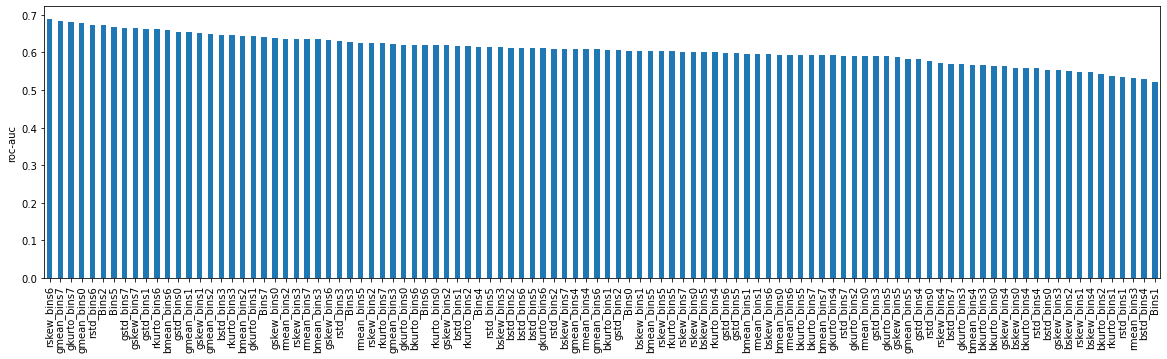

In [9]:
# now let's:

# 1) capture the roc-auc values in a pandas series
# 2) add the variable names in the index
# 3) sort the features based on the roc-auc
# 4) and make a var plot

roc_values = pd.Series(roc_values)
roc_values.index = X_train.columns
roc_values.sort_values(ascending=False).plot.bar(figsize=(20, 5))
plt.ylabel('roc-auc')

In [10]:
# a roc auc value of 0.5 indicates random decision
# let's check how many features show a roc-auc value
# higher than random

len(roc_values[roc_values > 0.62])

34

In [11]:
selected_features = roc_values[roc_values > 0.6].index

selected_features

Index(['Bins0', 'Bins2', 'Bins3', 'Bins4', 'Bins5', 'Bins6', 'Bins7',
       'rmean_bins2', 'rmean_bins4', 'rmean_bins5', 'rmean_bins7',
       'rstd_bins2', 'rstd_bins3', 'rstd_bins5', 'rstd_bins6', 'rskew_bins0',
       'rskew_bins2', 'rskew_bins3', 'rskew_bins5', 'rskew_bins6',
       'rskew_bins7', 'rkurto_bins0', 'rkurto_bins2', 'rkurto_bins3',
       'rkurto_bins4', 'rkurto_bins5', 'rkurto_bins6', 'rkurto_bins7',
       'gmean_bins0', 'gmean_bins1', 'gmean_bins2', 'gmean_bins3',
       'gmean_bins4', 'gmean_bins6', 'gmean_bins7', 'gstd_bins0', 'gstd_bins1',
       'gstd_bins2', 'gstd_bins7', 'gskew_bins0', 'gskew_bins1', 'gskew_bins2',
       'gskew_bins6', 'gskew_bins7', 'gkurto_bins0', 'gkurto_bins1',
       'gkurto_bins6', 'gkurto_bins7', 'bmean_bins2', 'bmean_bins3',
       'bmean_bins5', 'bmean_bins6', 'bstd_bins1', 'bstd_bins2', 'bstd_bins3',
       'bstd_bins5', 'bstd_bins6', 'bskew_bins1', 'bskew_bins3', 'bskew_bins5',
       'bskew_bins7', 'bkurto_bins1', 'bkurto_bins6']

In [12]:
# select features in the dataframes

X_train = X_train[selected_features]
X_test = X_test[selected_features]

X_train.shape, X_test.shape

((1733, 63), (743, 63))

In [13]:
# create a function to build random forests and
# compare its performance in train and test sets
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import scikitplot as skplt
import matplotlib.pyplot as plt

def run_randomForests(X_train, X_test, y_train, y_test):
    
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)
    
    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    y_pred = rf.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred)))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred)))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))
    
    print('After Cross Validation:')
    accuracies = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [14]:
# original
run_randomForests(X_train,
                  X_test,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.9844584345678349
Test set
Random Forests roc-auc: 0.9700617957106507
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.88      0.91       350
         1.0       0.90      0.94      0.92       393

    accuracy                           0.91       743
   macro avg       0.92      0.91      0.91       743
weighted avg       0.91      0.91      0.91       743

Confusion Matrix:
[[309  41]
 [ 23 370]]
Metrics:
Accuracy: 0.914
F1 Score: 0.920
Precision: 0.900
Recall: 0.941
After Cross Validation:
Accuracy: 91.11 %
Standard Deviation: 2.01 %


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

def run_logistic(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler().fit(X_train)
    
    # function to train and test the performance of logistic regression
    logit = LogisticRegression(penalty='l1', random_state=44, max_iter=1000, solver='liblinear')
    logit.fit(X_train, y_train)
    
    print('Train set')
    pred = logit.predict_proba(scaler.transform(X_train))
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = logit.predict_proba(scaler.transform(X_test))
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = logit.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred)))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred)))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))
    
    print('After Cross Validation:')
    accuracies = cross_val_score(estimator = logit, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [16]:
run_logistic(X_train, X_test, y_train, y_test)

Train set
Logistic Regression roc-auc: 0.9822529766299314
Test set
Logistic Regression roc-auc: 0.9745910577971647
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       350
         1.0       0.96      0.98      0.97       393

    accuracy                           0.97       743
   macro avg       0.97      0.97      0.97       743
weighted avg       0.97      0.97      0.97       743

Confusion Matrix:
[[335  15]
 [  8 385]]
Metrics:
Accuracy: 0.969
F1 Score: 0.971
Precision: 0.963
Recall: 0.980
After Cross Validation:
Accuracy: 95.44 %
Standard Deviation: 1.75 %


In [17]:
# create a function to build logistic regression
# and compare its performance in train and test sets
from sklearn.svm import SVC

def run_kernel_SVM(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler().fit(X_train)
    
    # function to train and test the performance of logistic regression
    classifier = SVC(kernel = 'rbf', random_state = 0, probability=True)
    classifier.fit(X_train, y_train)
    
    print('Train set')
    pred = classifier.predict_proba(scaler.transform(X_train))
    print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = classifier.predict_proba(scaler.transform(X_test))
    print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = classifier.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred)))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred)))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))
    
    print('After Cross Validation:')
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [18]:
run_kernel_SVM(X_train, X_test, y_train, y_test)

Train set
Kernel SVM roc-auc: 0.830397197202572
Test set
Kernel SVM roc-auc: 0.8206034169392948
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.72      0.78       350
         1.0       0.78      0.89      0.83       393

    accuracy                           0.81       743
   macro avg       0.82      0.80      0.81       743
weighted avg       0.81      0.81      0.81       743

Confusion Matrix:
[[251  99]
 [ 43 350]]
Metrics:
Accuracy: 0.809
F1 Score: 0.831
Precision: 0.780
Recall: 0.891
After Cross Validation:
Accuracy: 79.81 %
Standard Deviation: 3.20 %


In [19]:
# create a function to build logistic regression
# and compare its performance in train and test sets
from sklearn.neighbors import KNeighborsClassifier

def run_knn(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler().fit(X_train)
    
    # function to train and test the performance of logistic regression
    classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    classifier.fit(X_train, y_train)
    
    print('Train set')
    pred = classifier.predict_proba(scaler.transform(X_train))
    print('KNN roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = classifier.predict_proba(scaler.transform(X_test))
    print('KNN roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = classifier.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred)))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred)))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))
    
    print('After Cross Validation:')
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [20]:
run_knn(X_train, X_test, y_train, y_test)

Train set
KNN roc-auc: 0.5
Test set
KNN roc-auc: 0.5
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.83      0.87       350
         1.0       0.86      0.92      0.89       393

    accuracy                           0.88       743
   macro avg       0.88      0.88      0.88       743
weighted avg       0.88      0.88      0.88       743

Confusion Matrix:
[[292  58]
 [ 30 363]]
Metrics:
Accuracy: 0.882
F1 Score: 0.892
Precision: 0.862
Recall: 0.924
After Cross Validation:
Accuracy: 86.09 %
Standard Deviation: 2.73 %


In [21]:
from sklearn.tree import DecisionTreeClassifier


def run_decision_tree(X_train, X_test, y_train, y_test):

    # function to train and test the performance of logistic regression
    classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    classifier.fit(X_train, y_train)
    
    print('Train set')
    pred = classifier.predict_proba(X_train)
    print('Decision Tree roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = classifier.predict_proba(X_test)
    print('Decision Tree roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = classifier.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred)))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred)))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))
    
    print('After Cross Validation:')
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [22]:
run_decision_tree(X_train, X_test, y_train, y_test)

Train set
Decision Tree roc-auc: 1.0
Test set
Decision Tree roc-auc: 0.9018320610687023
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.88      0.90       350
         1.0       0.90      0.92      0.91       393

    accuracy                           0.90       743
   macro avg       0.90      0.90      0.90       743
weighted avg       0.90      0.90      0.90       743

Confusion Matrix:
[[308  42]
 [ 30 363]]
Metrics:
Accuracy: 0.903
F1 Score: 0.910
Precision: 0.896
Recall: 0.924
After Cross Validation:
Accuracy: 90.37 %
Standard Deviation: 2.62 %


In [23]:
# create a function to build logistic regression
# and compare its performance in train and test sets
from sklearn.naive_bayes import GaussianNB

def run_naive_bayes(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler().fit(X_train)
    
    # function to train and test the performance of logistic regression
    classifier = GaussianNB()
    classifier.fit(X_train, y_train)
    
    print('Train set')
    pred = classifier.predict_proba(scaler.transform(X_train))
    print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = classifier.predict_proba(scaler.transform(X_test))
    print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = classifier.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred)))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred)))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))
    
    print('After Cross Validation:')
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [24]:
run_naive_bayes(X_train, X_test, y_train, y_test)

Train set
Kernel SVM roc-auc: 0.5
Test set
Kernel SVM roc-auc: 0.5
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.85      0.87       350
         1.0       0.88      0.91      0.89       393

    accuracy                           0.88       743
   macro avg       0.89      0.88      0.88       743
weighted avg       0.88      0.88      0.88       743

Confusion Matrix:
[[299  51]
 [ 35 358]]
Metrics:
Accuracy: 0.884
F1 Score: 0.893
Precision: 0.875
Recall: 0.911
After Cross Validation:
Accuracy: 87.31 %
Standard Deviation: 2.43 %


In [25]:
# create a function to build logistic regression
# and compare its performance in train and test sets
from sklearn.svm import SVC

def run_linear_SVM(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler().fit(X_train)
    
    # function to train and test the performance of logistic regression
    classifier = SVC(kernel = 'linear', random_state = 0, probability=True)
    classifier.fit(X_train, y_train)
    
    print('Train set')
    pred = classifier.predict_proba(scaler.transform(X_train))
    print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = classifier.predict_proba(scaler.transform(X_test))
    print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = classifier.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred)))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred)))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))
    
    print('After Cross Validation:')
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [ ]:
run_linear_SVM(X_train, X_test, y_train, y_test)

Train set
Kernel SVM roc-auc: 0.5
Test set
Kernel SVM roc-auc: 0.5
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.92      0.94       350
         1.0       0.93      0.97      0.95       393

    accuracy                           0.95       743
   macro avg       0.95      0.95      0.95       743
weighted avg       0.95      0.95      0.95       743

Confusion Matrix:
[[323  27]
 [ 11 382]]
Metrics:
Accuracy: 0.949
F1 Score: 0.953
Precision: 0.934
Recall: 0.972
After Cross Validation:
